In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [231]:
# waveFreqs = np.random.rand(6)*400
# waveFreqs = waveFreqs.astype(int)
# print(waveFreqs)

# waveAmps = np.random.rand(6)*100
# waveAmps = waveAmps.astype(int) / 100  # 2dp
# print(waveAmps)

[218 290  60  54 119 148]
[0.57 0.01 0.93 0.12 0.32 0.64]


Text(0.5, 1.0, '[42, 69, 300, 314, 420] Hz sin waves sampled at 1000 Hz for 1 s')

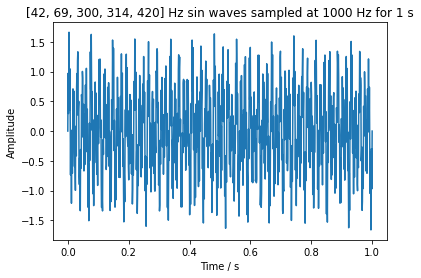

In [355]:
# Create a sine wave with multiple freq from 0 to 2 s

stopTime = 1
sampleFreq = 1000 # Hz
t = np.linspace(0, stopTime, int(stopTime * sampleFreq))
waveFreqs = [42, 69, 300 ,314, 420]
waveAmps = [0.42, 0.69, 0.05, 0.57, 0.001]
wave = np.sum([A * np.sin(2*np.pi*f*t) for f, A in zip(waveFreqs, waveAmps)], axis=0)

plt.plot(t, wave)
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.title(f"{waveFreqs} Hz sin waves sampled at {sampleFreq} Hz for {stopTime} s")

Text(0.5, 1.0, 'Normalised no Window Function')

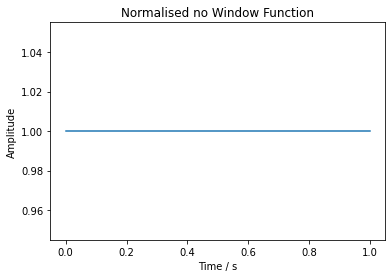

In [356]:
# Choose a window function from Numpy
# bartlett, blackman, hamming, hanning, kaiser

window = "no"
window_f = np.hanning(len(wave))
# Rectangular window:
window_f = np.ones_like(wave)
# window_f[:10] = 0
# window_f[-10:] = 0

# Plot window
plt.plot(t, window_f)
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.title(f"Normalised {window} Window Function")

Text(0, 0.5, 'Amplitude / dB')

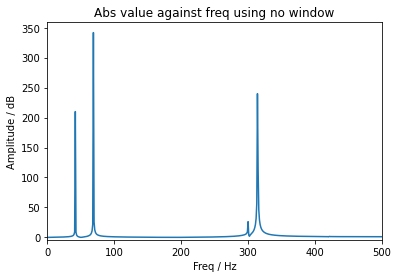

In [358]:
# DFT Analysis

sp = np.fft.fft(window_f*wave)
freqBins = np.fft.fftfreq(len(wave), 1/sampleFreq)

# Remove -ve freq
freqBins = freqBins[:len(freqBins)//2]
sp = sp[:len(sp)//2]

# Take the absolut value of sp
sp = np.absolute(sp)

plt.plot(freqBins, (sp))
plt.xlim(0, 500)
plt.ylim(-4)
plt.title(f"Abs value against freq using {window} window")
plt.xlabel("Freq / Hz")
plt.ylabel("Amplitude / dB")

Text(0, 0.5, 'Amplitude / dB')

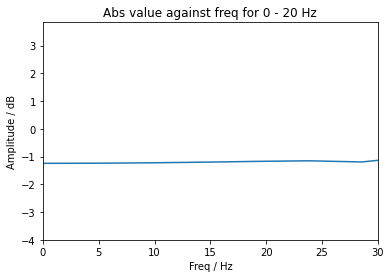

In [325]:
# Plot close to the first few freq
plt.plot(freqBins, np.log(sp))
plt.xlim(0, 30)
plt.ylim(-4)
plt.title(f"Abs value against freq for 0 - 20 Hz")
plt.xlabel("Freq / Hz")
plt.ylabel("Amplitude / dB")

Text(0, 0.5, 'Amplitude / dB')

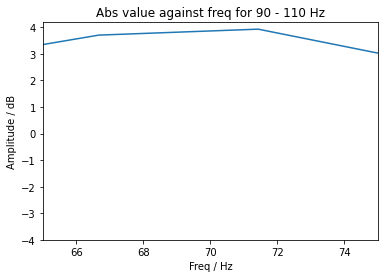

In [319]:
# Plot close to the first few freq
plt.plot(freqBins, np.log(sp))
plt.xlim(65, 75)
plt.ylim(-4)
plt.title(f"Abs value against freq for 90 - 110 Hz")
plt.xlabel("Freq / Hz")
plt.ylabel("Amplitude / dB")

In [163]:
# Print peaks close to known frequencies

print("Peaks at (Hz):")

for f in waveFreqs:
    # Find elements +/- 1 Hz either side of f
    f_min = f - 0.5
    f_max = f + 0.5
    f_min_idx = np.argmin(np.abs(freqBins - f_min))
    f_max_idx = np.argmin(np.abs(freqBins - f_max))

    # Find peak between these idx
    peak_idx = np.argmax(sp[f_min_idx: f_max_idx])
    print(freqBins[f_min_idx + peak_idx])

Peaks at (Hz):
4.814814814814815
11.11111111111111
71.11111111111111
68.88888888888889


In [87]:
np.argmin(np.abs(freqBins-5))

10

In [37]:
sp[10]

161.76460927901195